Link Dashboard : https://datastudio.google.com/reporting/0fe0f260-d4a7-47e2-a6e1-e449d3c215bf

# Milestone 1
```
Muhamad Arif Rachman Hatab
Batch 17 RMT
```

## Preparasi
```
1. Data Loading
2. Data Description
```


### 1. Data Loading
```
- connect to BigQuery
- import libraries
- check missing values
```

sumber data: 
https://www.kaggle.com/datasets/akashdeepkuila/bakery

In [ ]:
# loading data from BigQuery
# connect to BigQuery
from google.colab import auth
from google.cloud import bigquery
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from scipy import stats

auth.authenticate_user()
print('Authenticated')

#connect to google colab project id:
project_id = "p0gc3-371709"
client = bigquery.Client(project=project_id)


Authenticated


In [ ]:
# data display
df = client.query('''
SELECT *
FROM `p0gc3-371709.2.bakery`
''').to_dataframe()
df

,TransactionNo,Items,DateTime,Daypart,DayType
0,6588,Valentine's card,2017-02-14 23:29:03+00:00,Night,Weekday
1,6589,Valentine's card,2017-02-14 23:38:41+00:00,Night,Weekday
2,9448,Juice,2017-05-04 22:15:55+00:00,Night,Weekday
3,9448,Mineral water,2017-05-04 22:15:55+00:00,Night,Weekday
4,172,Bread,2016-10-31 17:06:47+00:00,Evening,Weekday
...,...,...,...,...,...
20502,9682,Coffee,2017-09-04 14:32:58+00:00,Afternoon,Weekend
20503,9682,Tea,2017-09-04 14:32:58+00:00,Afternoon,Weekend
20504,9683,Coffee,2017-09-04 14:57:06+00:00,Afternoon,Weekend
20505,9683,Pastry,2017-09-04 14:57:06+00:00,Afternoon,Weekend


In [ ]:
# looking for missing values from each column
df.isnull().sum()

TransactionNo    0
Items            0
DateTime         0
Daypart          0
DayType          0
dtype: int64

Tidak terdapat missing values.

### 2. Data Description

Dataset yang digunakan adalah detail transaksi berdasarkan nama item dan waktu terjual secara spesifik dari toko roti online.

In [ ]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20507 entries, 0 to 20506
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype              
---  ------         --------------  -----              
 0   TransactionNo  20507 non-null  Int64              
 1   Items          20507 non-null  object             
 2   DateTime       20507 non-null  datetime64[ns, UTC]
 3   Daypart        20507 non-null  object             
 4   DayType        20507 non-null  object             
dtypes: Int64(1), datetime64[ns, UTC](1), object(3)
memory usage: 821.2+ KB


Berikut adalah informasi yang dimuat dalam masing-masing kolom:
- `TransactionNo` : berisi indentifier unique untuk setiap transaksi / merupakan id untuk setiap transaksi
- `Items` : nama item yang terjual
- `DateTime` : tanggal dan waktu transaksi
- `Daypart` : keterangan hari transaksi
- `DayType` : keterangan bilamana transaksi dilakukan pada akhir pekan atau hari kerja

In [ ]:
# Mengetahui informasi tahun dari dataset
df_tahun = client.query('''
SELECT DISTINCT EXTRACT(YEAR FROM DateTime) AS Tahun
FROM `p0gc3-371709.2.bakery`
GROUP BY Tahun
''').to_dataframe()
df_tahun

,Tahun
0,2017
1,2016


## Problem Statement & Identifikasi Masalah

**Problem Statement**

Berdasarkan informasi yang dimuat dalam dataset maka kita dapat mencari tahu `Tren Sales Item Berdasarkan Preferensi Kastamer untuk Waktu atau Hari yang Berbeda pada Tahun 2016 Hingga 2017`.

**Identifikasi Masalah**

1. Total item terjual
2. Item yang paling banyak terjual setiap tahunnya untuk setiap kuarter
3. Kapan item paling banyak terjual pada tahun 2016 dan 2017 berdasarkan kolom Daypart?
4. Kapan item paling banyak terjual pada tahun 2016 dan 2017 berdasarkan kolom DayType?
5. Item apa yang paling banyak terjual berdasarkan kolom Daypart pada tahun 2016 dan 2017?
6. Item apa yang paling banyak terjual berdasarkan kolom DayType pada tahun 2016 dan 2017?
7. Mencari tahu korelasi antara item terjual dengan DayType dan DayPart


## Analisa

### 1. Jumlah Item dan Jumlah Sales dari Dataset

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20507 entries, 0 to 20506
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype              
---  ------         --------------  -----              
 0   TransactionNo  20507 non-null  Int64              
 1   Items          20507 non-null  object             
 2   DateTime       20507 non-null  datetime64[ns, UTC]
 3   Daypart        20507 non-null  object             
 4   DayType        20507 non-null  object             
dtypes: Int64(1), datetime64[ns, UTC](1), object(3)
memory usage: 821.2+ KB


In [ ]:
# Mencari total item 
df_name = client.query('''
SELECT DISTINCT Items
FROM `p0gc3-371709.2.bakery`
WHERE DateTime<'2017-01-01'
ORDER BY Items
''').to_dataframe()
df_name

,Items
0,Adjustment
1,Alfajores
2,Art Tray
3,Bacon
4,Bakewell
...,...
65,Tiffin
66,Toast
67,Truffles
68,Vegan mincepie


In [ ]:
# Mencari total item 
df_name = client.query('''
SELECT DISTINCT Items
FROM `p0gc3-371709.2.bakery`
WHERE DateTime>'2016-12-31'
ORDER BY Items
''').to_dataframe()
df_name

,Items
0,Afternoon with the baker
1,Alfajores
2,Argentina Night
3,Art Tray
4,Baguette
...,...
62,Truffles
63,Tshirt
64,Valentine's card
65,Vegan Feast


Terdapat perbedaan total item antara tahun 2016 (70 item) dan tahun 2017 (67 item), dapat diasumsikan terdapat pengurangan item dalam menu yang dilakukan pada tahun 2017 dikarenakan mungkin tingkat sales nya yang tidak berkembang untuk setiap kuartal pada tahun 2016.



In [ ]:
# Mencari total item terjual 

df_total = client.query('''
SELECT DISTINCT EXTRACT(YEAR FROM DateTime) AS Tahun,
       COUNT(Items) AS Total_Sales
FROM `p0gc3-371709.2.bakery`
GROUP BY Tahun
''').to_dataframe()
df_total

,Tahun,Total_Sales
0,2017,12363
1,2016,8144


Terdapat sebanyak 8,144 item terjual pada tahun 2016 dan sebanyak 12,363 item terjual pada tahun 2017.

Terjadi pengingkatan sales sebesar lebih dari 4000 item pada tahun 2017.

### 2. Item yang paling banyak terjual untuk setiap kuartal pada masing-masing tahun (Central Tendency Value)

#### Table Sample untuk Tahun 2016

In [ ]:
# data item dengan jumlah terjualnya tahun 2016
df_item2016 = client.query('''
SELECT *, 
       RANK() OVER(PARTITION BY Kuartal ORDER BY Kuartal, Sales DESC) AS rn
FROM (
SELECT EXTRACT(YEAR FROM DateTime) AS Year,
       EXTRACT(QUARTER FROM DateTime) AS Kuartal,
       Items,
       COUNT(Items) AS Sales
FROM `p0gc3-371709.2.bakery`
WHERE DateTime<'2017-01-01'
GROUP BY Year, Kuartal, Items
ORDER BY Year, Kuartal, Sales DESC)
''').to_dataframe()
df_item2016

,Year,Kuartal,Items,Sales,rn
0,2016,1,Coffee,217,1
1,2016,1,Bread,137,2
2,2016,1,Pastry,70,3
3,2016,1,Tea,64,4
4,2016,1,Sandwich,33,5
...,...,...,...,...,...
176,2016,4,Chicken sand,1,56
177,2016,4,Eggs,1,56
178,2016,4,Bowl Nic Pitt,1,56
179,2016,4,Bacon,1,56


#### Table Sample untuk Tahun 2017

In [ ]:
# data item dengan jumlah terjualnya tahun 2017
df_item2017 = client.query('''
SELECT *, 
       RANK() OVER(PARTITION BY Kuartal ORDER BY Sales DESC) AS rn
FROM (
SELECT EXTRACT(YEAR FROM DateTime) AS Year,
       EXTRACT(QUARTER FROM DateTime) AS Kuartal,
       Items,
       COUNT(Items) AS Sales
FROM `p0gc3-371709.2.bakery`
WHERE DateTime>='2017-01-01'
GROUP BY Year, Kuartal, Items
ORDER BY Year, Kuartal, Sales DESC)
''').to_dataframe()
df_item2017

,Year,Kuartal,Items,Sales,rn
0,2017,1,Coffee,2138,1
1,2017,1,Bread,1268,2
2,2017,1,Tea,572,3
3,2017,1,Cake,504,4
4,2017,1,Sandwich,355,5
...,...,...,...,...,...
208,2017,3,Half slice Monster,1,47
209,2017,3,My-5 Fruit Shoot,1,47
210,2017,3,Muesli,1,47
211,2017,3,Hearty & Seasonal,1,47


#### Nilai Modus Per Tahun

In [ ]:
# top 1 item untuk tahun 2016

df_item2016[df_item2016['rn'] <= 1]

,Year,Kuartal,Items,Sales,rn
0,2016,1,Coffee,217,1
37,2016,2,Coffee,279,1
78,2016,3,Coffee,188,1
116,2016,4,Coffee,1530,1


In [ ]:
# top 1 item untuk tahun 2017
df_item2017[df_item2017['rn'] <= 1]

,Year,Kuartal,Items,Sales,rn
0,2017,1,Coffee,2138,1
62,2017,2,Coffee,462,1
113,2017,4,Coffee,301,1
160,2017,3,Coffee,356,1


Berdasarkan tabel sampel di atas dapat diketahui bahwa nilai modus merepresentasikan item yang paling banyak terjual.

Sehingga dapat disimpulkan bahwa sepanjang tahun 2016 dan tahun 2017 item Kopi adalah yang paling banyak terjual untuk setiap kuartal nya.

#### Nilai Mean Per Tahun

In [ ]:
df_mean2016 = client.query('''

SELECT EXTRACT(YEAR FROM DateTime) AS Tahun,
       EXTRACT(QUARTER FROM DateTime) AS Kuartal,
       COUNT(Items) AS Total_Sales
FROM `p0gc3-371709.2.bakery`
GROUP BY Tahun, Kuartal
ORDER BY Tahun, Kuartal
''').to_dataframe()
df_mean2016

,Tahun,Kuartal,Total_Sales
0,2016,1,881
1,2016,2,1007
2,2016,3,659
3,2016,4,5597
4,2017,1,8114
5,2017,2,1704
6,2017,3,1378
7,2017,4,1167


In [ ]:
print('Rata-rata sales perkuartal untuk tahun 2016 adalah', df_mean2016[df_mean2016['Tahun']==2016]['Total_Sales'].mean())
print('Rata-rata sales perkuartal untuk tahun 2017 adalah', df_mean2016[df_mean2016['Tahun']==2017]['Total_Sales'].mean())

Rata-rata sales perkuartal untuk tahun 2016 adalah 2036.0
Rata-rata sales perkuartal untuk tahun 2017 adalah 3090.75


### 3. Jumlah item Terjual berdasarkan Daypart

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20507 entries, 0 to 20506
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype              
---  ------         --------------  -----              
 0   TransactionNo  20507 non-null  Int64              
 1   Items          20507 non-null  object             
 2   DateTime       20507 non-null  datetime64[ns, UTC]
 3   Daypart        20507 non-null  object             
 4   DayType        20507 non-null  object             
dtypes: Int64(1), datetime64[ns, UTC](1), object(3)
memory usage: 821.2+ KB


In [ ]:
df_dp = client.query('''
SELECT EXTRACT(YEAR FROM DateTime) AS Tahun,
       Daypart,
       COUNT(Daypart) AS Total_Sales
FROM `p0gc3-371709.2.bakery`
GROUP BY Tahun, Daypart
ORDER BY Tahun, Total_Sales DESC
''').to_dataframe()
df_dp

,Tahun,Daypart,Total_Sales
0,2016,Afternoon,4310
1,2016,Morning,3631
2,2016,Evening,201
3,2016,Night,2
4,2017,Afternoon,7259
5,2017,Morning,4773
6,2017,Evening,319
7,2017,Night,12


In [ ]:
#choosing plot style
mpl.style.use(['ggplot'])

In [ ]:
# grouping by year
tahun2016 = df_dp.loc[df_dp['Tahun'] == 2016]
tahun2017 = df_dp.loc[df_dp['Tahun'] == 2017]

# list for x label
labels = []
for i in tahun2016['Daypart']:
    labels.append(i)

# list for bar label
bar_label = []
for i in tahun2016['Total_Sales']:
    bar_label.append(i)
for j in tahun2017['Total_Sales']:
    bar_label.append(j)

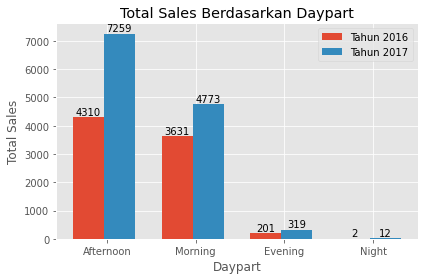

In [ ]:
# plotting

# seting bar width
x = np.arange(len(labels))
width = .35
fig, ax = plt.subplots()
bar1 = ax.bar(x-width/2, tahun2016['Total_Sales'], width, label='Tahun 2016')
bar2 = ax.bar(x+width/2, tahun2017['Total_Sales'], width, label='Tahun 2017')

# set x, y labels and title
ax.set_ylabel('Total Sales')
ax.set_xlabel('Daypart')
ax.set_title('Total Sales Berdasarkan Daypart')
plt.xticks(x + width/10, labels)
ax.legend()

# set bar labels
rects = ax.patches
for rect, label in zip(rects, bar_label):
    height = rect.get_height()
    ax.text(
        rect.get_x() + rect.get_width() / 2, height + 5, label, ha="center", va="bottom"
    )

fig.tight_layout()
plt.show()

Berdasarkan grafik bar di atas dapat diketahui bahwa baik pada tahun 2016 maupun tahun 2017, jumlah transaksi terbanyak terjadi pada siang hari yaitu sebanyak 4310 untuk tahun 2016 dan 7259 untuk tahun 2017, kemudian pada pagi hari dengan total transaksi 3631 untuk tahun 2016 dan 4773 untuk tahun 2017.

Atas dasar ini dapat kita lihat preferensi waktu transaksi yang dilakukan kastamer adalah pada saat siang hari dan pagi hari.

### 4. Jumlah Item Terjual Berdasarkan DayType

In [ ]:
df_dt = client.query('''
SELECT EXTRACT(YEAR FROM DateTime) AS Tahun,
       DayType,
       COUNT(DayType) AS Total_Sales
FROM `p0gc3-371709.2.bakery`
GROUP BY Tahun, DayType
ORDER BY Tahun, Total_Sales DESC
''').to_dataframe()
df_dt

,Tahun,DayType,Total_Sales
0,2016,Weekday,5322
1,2016,Weekend,2822
2,2017,Weekday,7485
3,2017,Weekend,4878


In [ ]:
# grouping by year
dt_tahun2016 = df_dt.loc[df_dt['Tahun'] == 2016]
dt_tahun2017 = df_dt.loc[df_dt['Tahun'] == 2017]

# list for x label
labels = []
for i in dt_tahun2016['DayType']:
    labels.append(i)

# list for bar label
bar_label = []
for i in dt_tahun2016['Total_Sales']:
    bar_label.append(i)
for j in dt_tahun2017['Total_Sales']:
    bar_label.append(j)

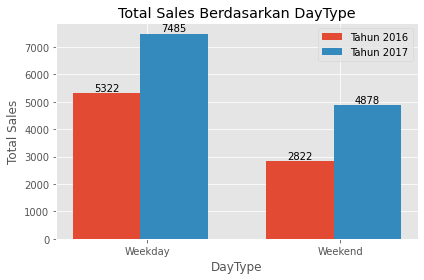

In [ ]:
# plotting

# seting bar width
x = np.arange(len(labels))
width = .35
fig, ax = plt.subplots()
bar1 = ax.bar(x-width/2, dt_tahun2016['Total_Sales'], width, label='Tahun 2016')
bar2 = ax.bar(x+width/2, dt_tahun2017['Total_Sales'], width, label='Tahun 2017')

# set x, y labels and title
ax.set_ylabel('Total Sales')
ax.set_xlabel('DayType')
ax.set_title('Total Sales Berdasarkan DayType')
plt.xticks(x + width/10, labels)
ax.legend()

# set bar labels
rects = ax.patches
for rect, label in zip(rects, bar_label):
    height = rect.get_height()
    ax.text(
        rect.get_x() + rect.get_width() / 2, height + 5, label, ha="center", va="bottom"
    )

fig.tight_layout()
plt.show()

Hasil plot di atas menunjukkan frekuensi terjadinya transaksi berdasarkan jenis hari nya, yaitu bilamana transaksi dilakukan pada hari kerja atau di akhir pekan.

Berdasarkan plotting, informasi yang kita tarik adalah bahwa sejumlah besar transaksi terjadi pada hari kerja baik untuk tahun 2016 maupun tahun 2017, dengan jumlah transaksi untuk hari kerja adalah 5322 untuk tahun 2016 dan 7485 untuk tahun 2017, kemudian untuk di akhir pekan adalah 2822 untuk thaun 2016 dan 4878 untuk tahun 2017.

Sehingga dapat kita lihat preferensi transaksi dari kastamer berdasarkan jenis hari, yaitu pada hari kerja.

### 5. Jumlah Item Terjual Berdasarkan Daypart

In [ ]:
# query untuk daypart
item_dp = client.query('''
SELECT *, ROW_NUMBER() OVER(PARTITION BY Tahun, Daypart ORDER BY Total_Sales DESC) AS Urut
FROM (
SELECT EXTRACT(YEAR FROM DateTime) AS Tahun,
       Daypart,
       Items,
       COUNT(Items) AS Total_Sales
FROM `p0gc3-371709.2.bakery`
WHERE Daypart IN ('Morning', 'Afternoon', 'Evening', 'Night')
GROUP BY Tahun, Daypart, Items
ORDER BY Tahun, Daypart, Total_Sales DESC)
''').to_dataframe()
item_dp

,Tahun,Daypart,Items,Total_Sales,Urut
0,2017,Afternoon,Coffee,1740,1
1,2017,Afternoon,Bread,995,2
2,2017,Afternoon,Tea,578,3
3,2017,Afternoon,Cake,547,4
4,2017,Afternoon,Sandwich,463,5
...,...,...,...,...,...
318,2016,Afternoon,Brioche and salami,1,60
319,2016,Afternoon,Muesli,1,61
320,2016,Afternoon,Chicken sand,1,62
321,2016,Afternoon,Granola,1,63


In [ ]:
# query untuk top 5
item_dp5 = item_dp[item_dp['Urut'] <= 5]

# group berdasarkan tahun, daypart dan ranking
item_dp5 = item_dp5.sort_values(by=['Tahun','Daypart', 'Urut'])

In [ ]:
# loc untuk masing-masing tahun
item_dp5_2016 = item_dp5.loc[item_dp5['Tahun'] == 2016]
item_dp5_2017 = item_dp5.loc[item_dp5['Tahun'] == 2017]


# preparasi plot
# loc untuk plot bar setiap Daypart 2016
Afternoon1 = item_dp5_2016.loc[item_dp5_2016['Daypart'] == 'Afternoon']
Evening1 = item_dp5_2016.loc[item_dp5_2016['Daypart'] == 'Evening']
Morning1 = item_dp5_2016.loc[item_dp5_2016['Daypart'] == 'Morning']
Night1 = item_dp5_2016.loc[item_dp5_2016['Daypart'] == 'Night']

# loc untuk plot bar setiap Daypart 2017
Afternoon2 = item_dp5_2017.loc[item_dp5_2017['Daypart'] == 'Afternoon']
Evening2 = item_dp5_2017.loc[item_dp5_2017['Daypart'] == 'Evening']
Morning2 = item_dp5_2017.loc[item_dp5_2017['Daypart'] == 'Morning']
Night2 = item_dp5_2017.loc[item_dp5_2017['Daypart'] == 'Night']

# loop untuk menyusun label x (Nama item) 2016
labels1 = []
for i in item_dp5_2016['Items']:
    labels1.append(i)

# loop untuk menyusun label x (Nama item) 2017
labels2 = []
for i in item_dp5_2017['Items']:
    labels2.append(i)

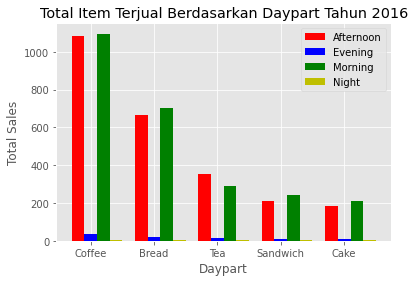

In [ ]:
# jumlah bar per group
n = 5
ind = np.arange(n)
width = .2

# plot bar berdasarkan group(daypart)
bar1 = plt.bar(ind, Afternoon1['Total_Sales'], width, color='r')
bar2 = plt.bar(ind+width, Evening1['Total_Sales'], width, color='b')
bar3 = plt.bar(ind+width*2, Morning1['Total_Sales'], width, color='g')
bar4 = plt.bar(ind+width*3, Night1['Total_Sales'], width, color='y')

plt.xlabel('Daypart')
plt.ylabel('Total Sales')
plt.title('Total Item Terjual Berdasarkan Daypart Tahun 2016')

plt.xticks(ind+width,labels1)
plt.legend((bar1, bar2, bar3, bar4), ('Afternoon', 'Evening', 'Morning', 'Night'))
plt.show()

Berdasarkan hasil plot di atas, item yang paling banyak terjual berdasarkan Daypart pada tahun 2016 adalah kopi dan roti.

Sehingga dapat kita simpulkan bahwa, pada tahun 2016 kopi dan roti adalah item yang paling populer. 

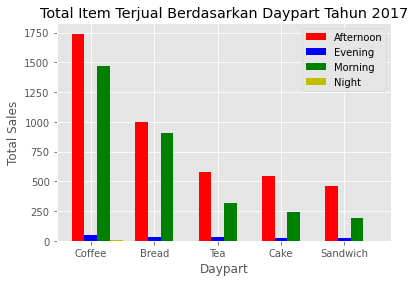

In [ ]:
# jumlah bar per group
n = 5
ind = np.arange(n)
width = .2

# plot bar berdasarkan group(daypart)
bar5 = plt.bar(ind, Afternoon2['Total_Sales'], width, color='r')
bar6 = plt.bar(ind+width, Evening2['Total_Sales'], width, color='b')
bar7 = plt.bar(ind+width*2, Morning2['Total_Sales'], width, color='g')
bar8 = plt.bar(ind+width*3, Night2['Total_Sales'], width, color='y')

plt.xlabel('Daypart')
plt.ylabel('Total Sales')
plt.title('Total Item Terjual Berdasarkan Daypart Tahun 2017')

plt.xticks(ind+width,labels2)
plt.legend((bar5, bar6, bar7, bar8), ('Afternoon', 'Evening', 'Morning', 'Night'))
plt.show()

Sama halnya dengan tahun 2016, pada tahun 2017, dengan jumlah penjualanya yang meningkat, kopi dan roti tetap menjadi item favorit kastamer untuk dipesan pada pagi hingga malam hari.

### 6. Item Terjual Berdasarkan DayType

In [ ]:
# query untuk daytype
item_dt = client.query('''
SELECT *, ROW_NUMBER() OVER(PARTITION BY Tahun, DayType ORDER BY Total_Sales DESC) AS Urut
FROM (
SELECT EXTRACT(YEAR FROM DateTime) AS Tahun,
       DayType,
       Items,
       COUNT(Items) AS Total_Sales
FROM `p0gc3-371709.2.bakery`
GROUP BY Tahun, DayType, Items
ORDER BY Tahun, DayType, Total_Sales DESC)
''').to_dataframe()
item_dt

,Tahun,DayType,Items,Total_Sales,Urut
0,2016,Weekend,Coffee,715,1
1,2016,Weekend,Bread,480,2
2,2016,Weekend,Tea,173,3
3,2016,Weekend,Medialuna,154,4
4,2016,Weekend,Hot chocolate,112,5
...,...,...,...,...,...
244,2017,Weekday,Brioche and salami,1,59
245,2017,Weekday,Muesli,1,60
246,2017,Weekday,Raspberry shortbread sandwich,1,61
247,2017,Weekday,Argentina Night,1,62


In [ ]:
# query untuk top 3
item_dt3 = item_dt[item_dt['Urut'] <= 3]

# group berdasarkan tahun, daypart dan ranking
item_dt3 = item_dt3.sort_values(by=['Tahun','DayType', 'Urut'])

In [ ]:
item_dt3

,Tahun,DayType,Items,Total_Sales,Urut
58,2016,Weekday,Coffee,1499,1
59,2016,Weekday,Bread,910,2
60,2016,Weekday,Tea,404,3
0,2016,Weekend,Coffee,715,1
1,2016,Weekend,Bread,480,2
2,2016,Weekend,Tea,173,3
186,2017,Weekday,Coffee,2044,1
187,2017,Weekday,Bread,1182,2
188,2017,Weekday,Tea,572,3
123,2017,Weekend,Coffee,1213,1


In [ ]:
# loc untuk masing-masing tahun
item_dt3_2016 = item_dt3.loc[item_dt3['Tahun'] == 2016]
item_dt3_2017 = item_dt3.loc[item_dt3['Tahun'] == 2017]


# preparasi plot
# loc untuk plot bar setiap Daypart 2016
Weekday1 = item_dt3_2016.loc[item_dt3_2016['DayType'] == 'Weekday']
Weekend1 = item_dt3_2016.loc[item_dt3_2016['DayType'] == 'Weekend']

# loc untuk plot bar setiap Daypart 2017
Weekday2 = item_dt3_2017.loc[item_dt3_2017['DayType'] == 'Weekday']
Weekend2 = item_dt3_2017.loc[item_dt3_2017['DayType'] == 'Weekend']

# loop untuk menyusun label x (Nama item) 2016
labels1 = []
for i in item_dt3_2016['Items']:
    labels1.append(i)

# loop untuk menyusun label x (Nama item) 2017
labels2 = []
for i in item_dt3_2017['Items']:
    labels2.append(i)

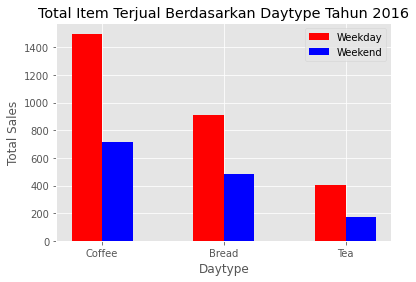

In [ ]:
# jumlah bar per group
n = 3
ind = np.arange(n)
width = .25

# plot bar berdasarkan group(daytype)
bar1 = plt.bar(ind, Weekday1['Total_Sales'], width, color='r')
bar2 = plt.bar(ind+width, Weekend1['Total_Sales'], width, color='b')

plt.xlabel('Daytype')
plt.ylabel('Total Sales')
plt.title('Total Item Terjual Berdasarkan Daytype Tahun 2016')

plt.xticks(ind+width/2,labels1)
plt.legend((bar1, bar2), ('Weekday', 'Weekend'))
plt.show()

Plot di atas berisi informasi tentang 3 item yang paling banyak terjual berdasarkan jumlahnya untuk setiap jenis hari (hari kerja atau akhir pekan) pada tahun 2016.

Informasi yang dapat kita tarik adalah, bahwa untuk tahun 2016:
```
1. transaksi lebih aktif pada saat weekday dibandingkan dengan weekend,
2. item terbanyak baik untuk weekday maupun weekend adalah kopi dengan jumlah transaksi 1499 untuk weekday dan 715 untuk weekend,
3. kemudian item roti mengikuti dengan jumlah transaksi 910 untuk weekday dan 480 untuk weekend.
```

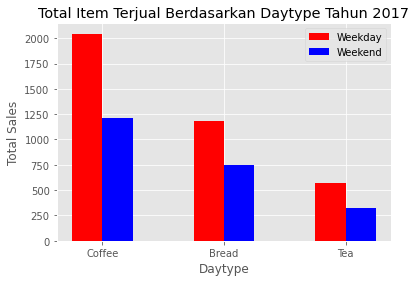

In [ ]:
# jumlah bar per group
n = 3
ind = np.arange(n)
width = .25

# plot bar berdasarkan group(daytype)
bar3 = plt.bar(ind, Weekday2['Total_Sales'], width, color='r')
bar4 = plt.bar(ind+width, Weekend2['Total_Sales'], width, color='b')

plt.xlabel('Daytype')
plt.ylabel('Total Sales')
plt.title('Total Item Terjual Berdasarkan Daytype Tahun 2017')

plt.xticks(ind+width/2,labels2)
plt.legend((bar3, bar4), ('Weekday', 'Weekend'))
plt.show()

Berdasarkan hasil plot informasi yang dapat kita tarik adalah, bahwa pada tahun 2017:
```
1. 3 item terlaris pada tahun 2016, tetap bertahan pada posisinya masing-masing, dengan jumlah penjualan ketiga item meningkat pada tahun 2017,
2. Untuk setiap item, transaksi paling banyak dilakukan di hari kerja dibandingkan akhir pekan, dengan item kopi sebagai item yang paling laris. 
```

### 7. Korelasi antara item terjual dengan DayType dan DayPart


#### Korelasi antara jumlah sales dengan DayType

Pada bagian ini kita akan menguji korelasi jumlah sales dengan tipe hari (hari kerja dan akhir pekan), dengan membandingkan bilamana ada nya perbedaan yang signifikan antara jumlah sales pada hari kerja dan pada akhir pekan.
```
H0: Jumlah sales pada hari kerja dengan jumlah sales pada akhir pekan tidak berbeda secara signifikan
H1: Jumlah sales pada hari kerja dengan jumlah sales pada akhir pekan memiliki perbedaan yang cukup signifikan
CV = .1
```

In [ ]:
# membuat sampel representasi daytype
rep_dt = client.query('''
SELECT EXTRACT(YEAR FROM DateTime) AS Tahun,
       EXTRACT(QUARTER FROM DateTime) AS Kuartal,
       DayType,
       COUNT(Items) AS Sales,
FROM `p0gc3-371709.2.bakery`
GROUP BY Tahun, Kuartal, Daytype
ORDER BY Tahun, Kuartal
''').to_dataframe()
rep_dt

,Tahun,Kuartal,DayType,Sales
0,2016,1,Weekday,690
1,2016,1,Weekend,191
2,2016,2,Weekday,414
3,2016,2,Weekend,593
4,2016,3,Weekday,659
5,2016,4,Weekday,3559
6,2016,4,Weekend,2038
7,2017,1,Weekday,5291
8,2017,1,Weekend,2823
9,2017,2,Weekday,861


In [ ]:
# data frame sales berdasarkan daytype
rep_dt1 = rep_dt['Sales'][rep_dt['DayType']=='Weekday']
rep_dt2 = rep_dt['Sales'][rep_dt['DayType']=='Weekend']

In [ ]:
print(rep_dt1)
print(rep_dt2)

0      690
2      414
4      659
5     3559
7     5291
9      861
11     813
13     520
Name: Sales, dtype: Int64
1      191
3      593
6     2038
8     2823
10     843
12     565
14     647
Name: Sales, dtype: Int64


In [ ]:
t_stat, p_val = stats.ttest_ind(rep_dt1, rep_dt2)
print(f'P-value: {p_val}')

P-value: 0.5240497948351265


Hasil uji menunjukkan bahwa secara keseluruhan, terdapat perbedaan yang signifikan antara jumlah sales pada hari kerja dan akhir pekan.

#### Korelasi antara jumlah sales dengan Daypart

Apakah terdapat perbedaan jumlah sales pada saat pagi, siang dan sore?
```
H0: Tidak terdapat perbedaan yang signifikan antara jumlah sales pada pagi, siang dan sore hari
H1: Terdapat perbedaan yang signifikan antara jumlah sales pada pagi, siang dan sore hari
CV = .1
```

In [ ]:
# membuat sampel representasi daypart
rep_dp = client.query('''
SELECT EXTRACT(YEAR FROM DateTime) AS Tahun,
       EXTRACT(QUARTER FROM DateTime) AS Kuartal,
       Daypart,
       COUNT(Items) AS Sales,
FROM `p0gc3-371709.2.bakery`
GROUP BY Tahun, Kuartal, Daypart
ORDER BY Tahun, Kuartal
''').to_dataframe()
rep_dp

,Tahun,Kuartal,Daypart,Sales
0,2016,1,Evening,30
1,2016,1,Morning,376
2,2016,1,Afternoon,475
3,2016,2,Evening,15
4,2016,2,Morning,473
5,2016,2,Afternoon,519
6,2016,3,Evening,23
7,2016,3,Morning,307
8,2016,3,Afternoon,329
9,2016,4,Evening,133


In [ ]:
# data frame sales berdasarkan 3 daypart
rep_dp1 = rep_dp['Sales'][rep_dp['Daypart']=='Afternoon']
rep_dp2 = rep_dp['Sales'][rep_dp['Daypart']=='Evening']
rep_dp3 = rep_dp['Sales'][rep_dp['Daypart']=='Morning']

In [ ]:
f_stat,p_value = stats.f_oneway(rep_dp1, rep_dp2, rep_dp3)
print('P-value:',p_value)

P-value: 0.06129716384218127


Berdasarkan hasil uji, secara keseluruhan terdapat perbedaan yang signifikan antara jumlah sales pada pagi, siang dan sore hari

## Kesimpulan

Berdasarkan analisa yang telah dilakukan terhadap data yang dimiliki dapat kita lihat trend atau preferensi atas transaksi yang dilakukan kastamer sepanjang tahun 2016 dan tahun 2017, diantaranya adalah:
```
1. Waktu transaksi yang secara keseluruhan lebih banyak dilakukan pada siang hari.
2. Transaksi secara keseluruhan lebih banyak dilakukan pada hari kerja.
3. Kopi dan roti adalah item dengan preferensi tertinggi.
```